In [56]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [38]:
#Data Pre-processing

data = pd.read_csv("PIMA.csv")
#separating labels
X= data.iloc[:,0:8]
y= data.iloc[:,8]

#relacing zero with mean values
not_zero= ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in not_zero:
    X[column] = X[column].replace(0, np.NaN)
    mean = int(X[column].mean(skipna=True))
    X[column] = X[column].replace(np.NaN, mean)


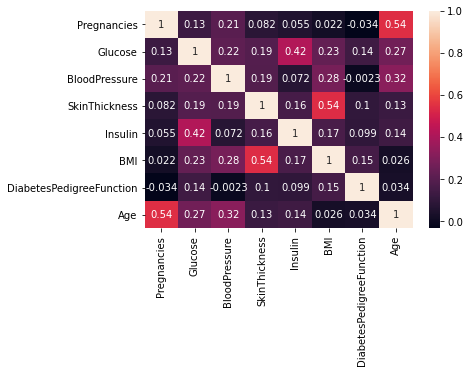

In [39]:
#heatmap of correlatyion
sns.heatmap(X.corr(), annot=True)

In [47]:

#spliting the dataset into train and test datset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

#Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [51]:
#implementing SVC with Linear Kernel
classifier = SVC(random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [52]:
#predicting output
y_pred = classifier.predict(X_test)

F1 Score : 0.5454545454545454
Accuracy Score: 0.7402597402597403


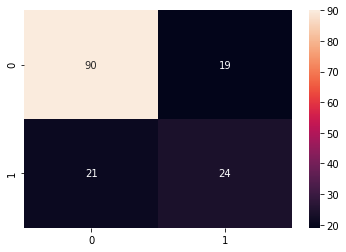

In [63]:
#Evaluations
cm = confusion_matrix(y_test, y_pred)
print("F1 Score :",f1_score(y_test, y_pred))
print("Accuracy Score:" ,accuracy_score(y_test, y_pred))
sns.heatmap(cm, annot=True)
